In [27]:
#import libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_excel("Online Retail.xlsx")

In [3]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [5]:
#drop rows with customer ID
data = data.dropna(subset=['CustomerID'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


In [7]:
#create an invoice month
import datetime as dt

#function for month
def get_month(x):
    return dt.datetime(x.year, x.month,1)

#apply the function
data['InvoiceMonth'] = data['InvoiceDate'].apply(get_month)
data.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,2011-12-01
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011-12-01
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-01
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-01
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,2011-12-01


In [9]:
#create a column index with the date aka first time customer was aquired
data['Cohort Month'] = data.groupby('CustomerID')['InvoiceMonth'].transform('min')
data.tail(30)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,Cohort Month
541879,581585,22726,ALARM CLOCK BAKELIKE GREEN,8,2011-12-09 12:31:00,3.75,15804.0,United Kingdom,2011-12-01,2011-05-01
541880,581585,22727,ALARM CLOCK BAKELIKE RED,4,2011-12-09 12:31:00,3.75,15804.0,United Kingdom,2011-12-01,2011-05-01
541881,581585,16016,LARGE CHINESE STYLE SCISSOR,10,2011-12-09 12:31:00,0.85,15804.0,United Kingdom,2011-12-01,2011-05-01
541882,581585,21916,SET 12 RETRO WHITE CHALK STICKS,24,2011-12-09 12:31:00,0.42,15804.0,United Kingdom,2011-12-01,2011-05-01
541883,581585,84692,BOX OF 24 COCKTAIL PARASOLS,25,2011-12-09 12:31:00,0.42,15804.0,United Kingdom,2011-12-01,2011-05-01
541884,581585,84946,ANTIQUE SILVER T-LIGHT GLASS,12,2011-12-09 12:31:00,1.25,15804.0,United Kingdom,2011-12-01,2011-05-01
541885,581585,21684,SMALL MEDINA STAMPED METAL BOWL,12,2011-12-09 12:31:00,0.85,15804.0,United Kingdom,2011-12-01,2011-05-01
541886,581585,22398,MAGNETS PACK OF 4 SWALLOWS,12,2011-12-09 12:31:00,0.39,15804.0,United Kingdom,2011-12-01,2011-05-01
541887,581585,23328,SET 6 SCHOOL MILK BOTTLES IN CRATE,4,2011-12-09 12:31:00,3.75,15804.0,United Kingdom,2011-12-01,2011-05-01
541888,581585,23145,ZINC T-LIGHT HOLDER STAR LARGE,12,2011-12-09 12:31:00,0.95,15804.0,United Kingdom,2011-12-01,2011-05-01


In [10]:
#create a date element function to get a series for substraction
def get_date_elements(df,column):
    day = df[column].dt.day
    month = df[column].dt.month
    year = df[column].dt.year
    return day, month, year

In [11]:
#get date element for our cohort and invoice columns
_,Invoice_month,Invoice_year = get_date_elements(data,'InvoiceMonth')
_,Cohort_month,Cohort_year = get_date_elements(data,'Cohort Month')

In [12]:
#check the series
Invoice_month[:10]

0    12
1    12
2    12
3    12
4    12
5    12
6    12
7    12
8    12
9    12
Name: InvoiceMonth, dtype: int64

In [13]:
Cohort_month[:10]

0    12
1    12
2    12
3    12
4    12
5    12
6    12
7    12
8    12
9    12
Name: Cohort Month, dtype: int64

In [14]:
Cohort_year[:10]

0    2010
1    2010
2    2010
3    2010
4    2010
5    2010
6    2010
7    2010
8    2010
9    2010
Name: Cohort Month, dtype: int64

In [15]:
#create a Cohort index
year_diff = Invoice_year - Cohort_year
month_diff = Invoice_month - Cohort_month
data['CohortIndex'] = year_diff*12+month_diff+1
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,Cohort Month,CohortIndex
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,2010-12-01,1
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,2010-12-01,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1


In [16]:
year_diff = Invoice_year - Cohort_year
month_diff = Invoice_month - Cohort_month
data['CohortIndex'] = year_diff*12+month_diff+1
data.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,Cohort Month,CohortIndex
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,2011-12-01,2011-08-01,5
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011-12-01,2011-08-01,5
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-01,2011-08-01,5
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-01,2011-08-01,5
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,2011-12-01,2011-08-01,5


In [17]:
#count the customerID by Cohort month and Cohort Index
data.groupby(['Cohort Month','CohortIndex'])['CustomerID'].nunique()

Cohort Month  CohortIndex
2010-12-01    1              948
              2              362
              3              317
              4              367
              5              341
                            ... 
2011-10-01    2               93
              3               46
2011-11-01    1              321
              2               43
2011-12-01    1               41
Name: CustomerID, Length: 91, dtype: int64

In [18]:
data.groupby(['Cohort Month','CohortIndex'])['CustomerID'].apply(pd.Series.unique)

Cohort Month  CohortIndex
2010-12-01    1              [17850.0, 13047.0, 12583.0, 13748.0, 15100.0, ...
              2              [18097.0, 16656.0, 13094.0, 17315.0, 14606.0, ...
              3              [15240.0, 14911.0, 14496.0, 17675.0, 12712.0, ...
              4              [13880.0, 17068.0, 12971.0, 15194.0, 18044.0, ...
              5              [13694.0, 13758.0, 15018.0, 13468.0, 18118.0, ...
                                                   ...                        
2011-10-01    2              [13028.0, 16648.0, 13882.0, 12552.0, 16164.0, ...
              3              [13853.0, 18130.0, 12572.0, 14121.0, 15993.0, ...
2011-11-01    1              [13697.0, 14345.0, 17503.0, 16830.0, 17495.0, ...
              2              [17636.0, 14950.0, 14860.0, 13040.0, 16376.0, ...
2011-12-01    1              [14804.0, 15904.0, 16789.0, 12558.0, 17942.0, ...
Name: CustomerID, Length: 91, dtype: object

In [23]:
Cohort_data = data.groupby(['Cohort Month','CohortIndex'])['CustomerID'].apply(pd.Series.nunique).reset_index()
Cohort_data

,Cohort Month,CohortIndex,CustomerID
0,2010-12-01,1,948
1,2010-12-01,2,362
2,2010-12-01,3,317
3,2010-12-01,4,367
4,2010-12-01,5,341
...,...,...,...
86,2011-10-01,2,93
87,2011-10-01,3,46
88,2011-11-01,1,321
89,2011-11-01,2,43


In [26]:
#create a pivot table
Cohort_table = Cohort_data.pivot(index='Cohort Month', columns=['CohortIndex'], values='CustomerID')
Cohort_table

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
Cohort Month,,,,,,,,,,,,,
2010-12-01,948.0,362.0,317.0,367.0,341.0,376.0,360.0,336.0,336.0,374.0,354.0,474.0,260.0
2011-01-01,421.0,101.0,119.0,102.0,138.0,126.0,110.0,108.0,131.0,146.0,155.0,63.0,NaN
2011-02-01,380.0,94.0,73.0,106.0,102.0,94.0,97.0,107.0,98.0,119.0,35.0,NaN,NaN
2011-03-01,440.0,84.0,112.0,96.0,102.0,78.0,116.0,105.0,127.0,39.0,NaN,NaN,NaN
2011-04-01,299.0,68.0,66.0,63.0,62.0,71.0,69.0,78.0,25.0,NaN,NaN,NaN,NaN
2011-05-01,279.0,66.0,48.0,48.0,60.0,68.0,74.0,29.0,NaN,NaN,NaN,NaN,NaN
2011-06-01,235.0,49.0,44.0,64.0,58.0,79.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,191.0,40.0,39.0,44.0,52.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,167.0,42.0,42.0,42.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='CohortIndex', ylabel='Cohort Month'>

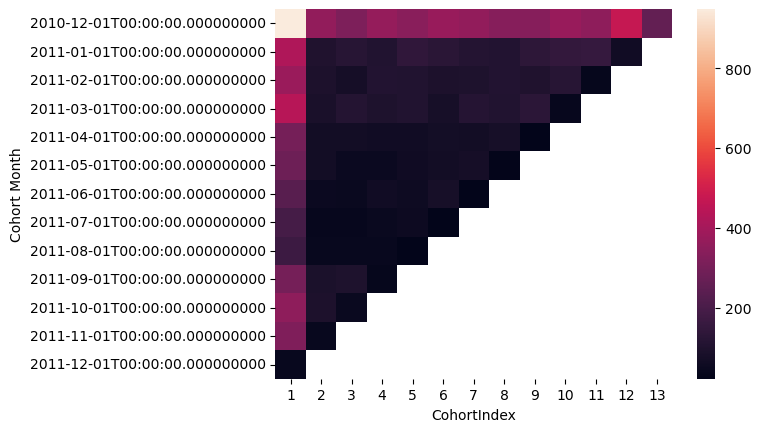

In [28]:
#visualize the result in heatmap
sns.heatmap(Cohort_table)

<AxesSubplot:xlabel='CohortIndex', ylabel='Cohort Month'>

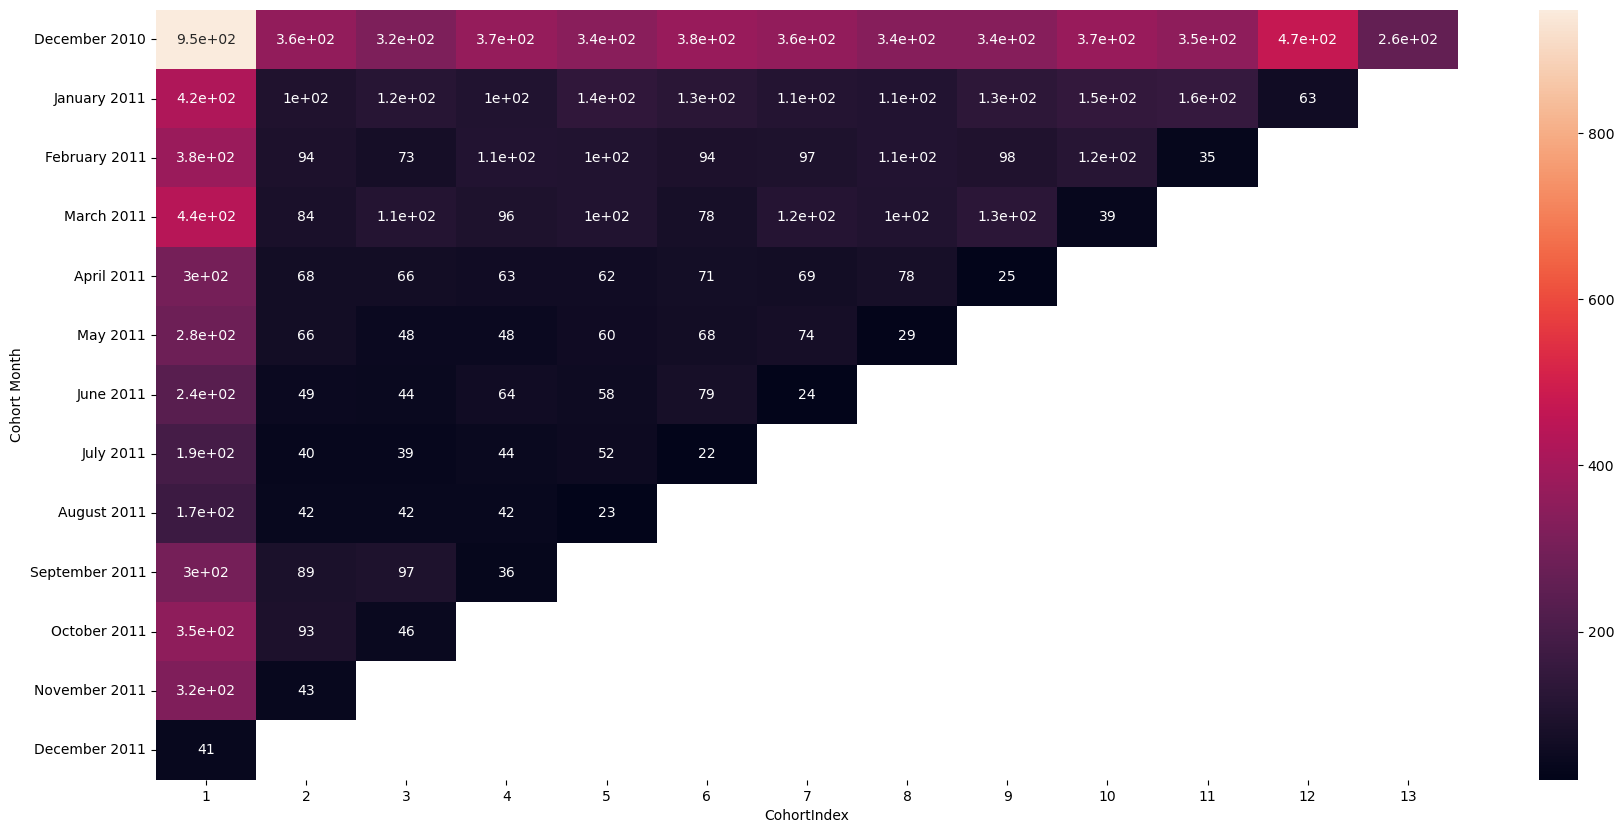

In [33]:
#change index
Cohort_table.index = Cohort_table.index.strftime('%B %Y')
plt.figure(figsize=(21,10))
sns.heatmap(Cohort_table,annot=True)

<AxesSubplot:xlabel='CohortIndex', ylabel='Cohort Month'>

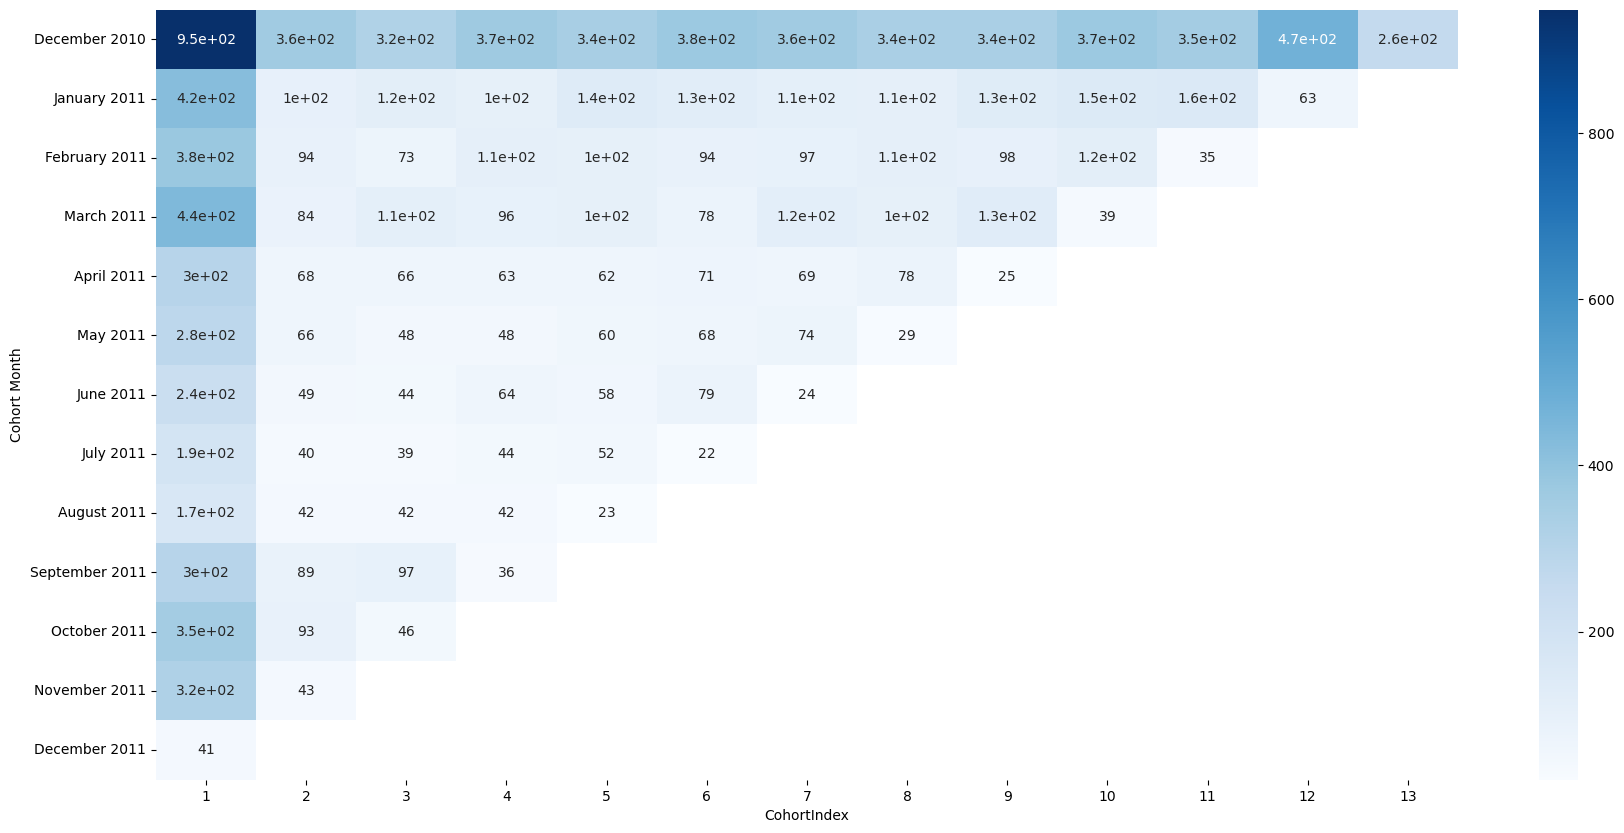

In [35]:
#Cohort_table.index = Cohort_table.index.strftime('%B %Y')
plt.figure(figsize=(21,10))
sns.heatmap(Cohort_table,annot=True,cmap = 'Blues')

In [37]:
#cohort table for percentage

New_Cohort_Table = Cohort_table.divide(Cohort_table.iloc[:,0],axis=0)
New_Cohort_Table

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
Cohort Month,,,,,,,,,,,,,
December 2010,1.0,0.381857,0.334388,0.387131,0.359705,0.396624,0.379747,0.354430,0.354430,0.394515,0.373418,0.500000,0.274262
January 2011,1.0,0.239905,0.282660,0.242280,0.327791,0.299287,0.261283,0.256532,0.311164,0.346793,0.368171,0.149644,NaN
February 2011,1.0,0.247368,0.192105,0.278947,0.268421,0.247368,0.255263,0.281579,0.257895,0.313158,0.092105,NaN,NaN
March 2011,1.0,0.190909,0.254545,0.218182,0.231818,0.177273,0.263636,0.238636,0.288636,0.088636,NaN,NaN,NaN
April 2011,1.0,0.227425,0.220736,0.210702,0.207358,0.237458,0.230769,0.260870,0.083612,NaN,NaN,NaN,NaN
May 2011,1.0,0.236559,0.172043,0.172043,0.215054,0.243728,0.265233,0.103943,NaN,NaN,NaN,NaN,NaN
June 2011,1.0,0.208511,0.187234,0.272340,0.246809,0.336170,0.102128,NaN,NaN,NaN,NaN,NaN,NaN
July 2011,1.0,0.209424,0.204188,0.230366,0.272251,0.115183,NaN,NaN,NaN,NaN,NaN,NaN,NaN
August 2011,1.0,0.251497,0.251497,0.251497,0.137725,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='CohortIndex', ylabel='Cohort Month'>

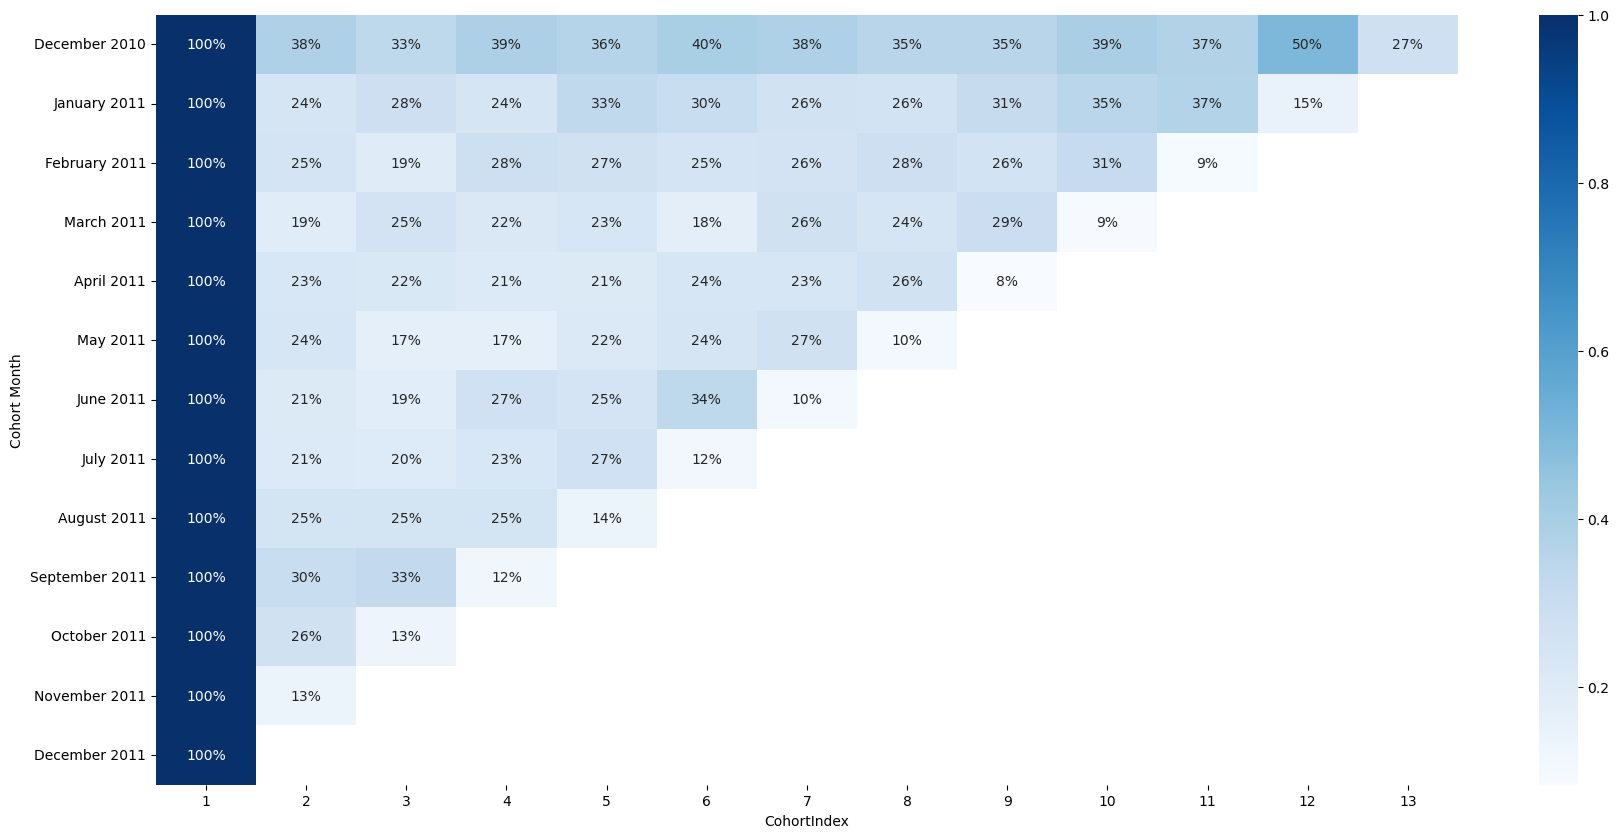

In [42]:
#create a percentage visuals

plt.figure(figsize=(21,10))
sns.heatmap(New_Cohort_Table,annot=True,cmap = 'Blues',fmt='.0%')